## Experiment 2: Comparison between k-medoids, Fast k-medoids and Fold Fast k-medoids (section 3.3)

In [2]:
import os, sys, random, pickle
from datetime import datetime
from zoneinfo import ZoneInfo  
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt  
from PyDistances.quantitative import robust_maha_dist_matrix
from sklearn_extra.cluster import KMedoids
from FastKmedoids.models import FastKmedoidsGGower, FoldFastKmedoidsGGower

sns.set_style('whitegrid')

current_path = os.getcwd()
src_path = os.path.join(current_path, '..', '..', 'src')
config_path = os.path.join(current_path, '..', '..', 'config')

sys.path.append(src_path)
sys.path.append(config_path)

from experiments_utils import (make_experiment_2, 
                               get_pivoted_results_two_iterables,
                               get_avg_results_two_iterables,
                               avg_results_to_dfs,
                               split_list_in_chunks,
                               )

from config_experiment_2 import get_config as get_config_exp_2

In [3]:
experiment_2_config = get_config_exp_2()

In [11]:
models = {
    'KMedoids-euclidean': KMedoids(n_clusters=experiment_2_config['n_clusters'], 
                                   metric='euclidean', 
                                   method=experiment_2_config['method'], 
                                   init=experiment_2_config['init'], 
                                   max_iter=experiment_2_config['max_iter'], 
                                   random_state=experiment_2_config['random_state']),

    'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming': FastKmedoidsGGower(
            n_clusters=experiment_2_config['n_clusters'], 
            method=experiment_2_config['method'], 
            init=experiment_2_config['init'], 
            max_iter=experiment_2_config['max_iter'], 
            random_state=experiment_2_config['random_state'],
            frac_sample_size=experiment_2_config['frac_sample_size'], 
            p1=experiment_2_config['p1'], 
            p2=experiment_2_config['p2'], 
            p3=experiment_2_config['p3'], 
            d1='robust_mahalanobis', 
            d2='sokal', 
            d3='hamming', 
            robust_method='winsorized', 
            alpha=experiment_2_config['alpha'], 
            epsilon=experiment_2_config['epsilon'], 
            n_iters=experiment_2_config['n_iters'],
            VG_sample_size=experiment_2_config['VG_sample_size'], 
            VG_n_samples=experiment_2_config['VG_n_samples']),


    'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming': FoldFastKmedoidsGGower(
            n_clusters=experiment_2_config['n_clusters'], 
            method=experiment_2_config['method'], 
            init=experiment_2_config['init'], 
            max_iter=experiment_2_config['max_iter'], 
            random_state=experiment_2_config['random_state'],
            frac_sample_size=experiment_2_config['frac_sample_size'], 
            p1=experiment_2_config['p1'], 
            p2=experiment_2_config['p2'], 
            p3=experiment_2_config['p3'], 
            d1='robust_mahalanobis', 
            d2='sokal', 
            d3='hamming', 
            robust_method='winsorized', 
            alpha=experiment_2_config['alpha'], 
            epsilon=experiment_2_config['epsilon'], 
            n_iters=experiment_2_config['n_iters'],
            VG_sample_size=experiment_2_config['VG_sample_size'], 
            VG_n_samples=experiment_2_config['VG_n_samples'],
            n_splits=experiment_2_config['n_splits'], 
            shuffle=experiment_2_config['shuffle'], 
            kfold_random_state=experiment_2_config['kfold_random_state']) 

}

model_names = list(models.keys())

In [6]:
n_realizations = 100
experiment_random_state = 123 
random.seed(experiment_random_state)
random_state_list = random.sample(range(n_realizations*1000), n_realizations)

chunk_size = 3
random_state_list_chunks = split_list_in_chunks(random_state_list, chunk_size=chunk_size)

results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_2')
os.makedirs(results_folder_path, exist_ok=True)
file_id = datetime.now(ZoneInfo("Europe/Madrid")).strftime('%Y%m%d_%H%M%S')
file_id = '20251023_092122'

In [5]:
for chunk_id, random_state_chunk in enumerate(tqdm(random_state_list_chunks[6:], desc='chunks', unit='chunks'), start=6):
    print("chunk_id:", chunk_id)
    print('random_state_chunk:', random_state_chunk)

    results = {}

    for random_state in random_state_chunk:
        print('random_state:', random_state)
                        
        results[random_state] = make_experiment_2(
                n_samples_list = experiment_2_config['n_samples_list'], 
                models = models, 
                random_state = random_state
                )
            
    # Save results
    results_filename = f'results_exp_2_chunk_{chunk_id}_{file_id}.pkl'
    results_save_path = os.path.join(results_folder_path, results_filename)
    with open(results_save_path, 'wb') as f:
        pickle.dump(results, f)
        
# Time 100 realization: 
## IBiDat server:  mins

chunks:   0%|          | 0/28 [00:00<?, ?chunks/s]

chunk_id: 6
random_state_chunk: [91971, 32134, 21466]
random_state: 91971
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.17s/it]


random_state: 32134
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.17s/it]


random_state: 21466
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


35000


chunks:   4%|▎         | 1/28 [29:30<13:16:44, 1770.55s/chunks]

chunk_id: 7
random_state_chunk: [218, 57183, 11483]
random_state: 218
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.22s/it]


random_state: 57183
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.40s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.54s/it]


random_state: 11483
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


35000


chunks:   7%|▋         | 2/28 [55:29<11:53:13, 1645.90s/chunks]

chunk_id: 8
random_state_chunk: [78328, 49492, 9158]
random_state: 78328
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.15s/it]


random_state: 49492
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.14s/it]


random_state: 9158
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


35000


chunks:  11%|█         | 3/28 [1:19:35<10:47:45, 1554.61s/chunks]

chunk_id: 9
random_state_chunk: [864, 41347, 95949]
random_state: 864
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.16s/it]


random_state: 41347
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.16s/it]


random_state: 95949
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


35000


chunks:  14%|█▍        | 4/28 [1:44:55<10:16:26, 1541.08s/chunks]

chunk_id: 10
random_state_chunk: [58762, 13374, 5752]
random_state: 58762
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.15s/it]


random_state: 13374
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.14s/it]


random_state: 5752
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.95s/it]


35000


chunks:  18%|█▊        | 5/28 [2:11:10<9:55:23, 1553.22s/chunks] 

chunk_id: 11
random_state_chunk: [12158, 87443, 18635]
random_state: 12158
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.16s/it]


random_state: 87443
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.16s/it]


random_state: 18635
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


10000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


35000


chunks:  21%|██▏       | 6/28 [2:37:44<9:34:36, 1567.10s/chunks]

chunk_id: 12
random_state_chunk: [16547, 2783, 38247]
random_state: 16547
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.29s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.87s/it]


random_state: 2783
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.23s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:27<00:00,  5.42s/it]


random_state: 38247
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.81s/it]


35000


chunks:  25%|██▌       | 7/28 [3:16:23<10:34:30, 1812.87s/chunks]

chunk_id: 13
random_state_chunk: [56444, 75157, 62511]
random_state: 56444
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.81s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:14<00:00,  2.87s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:24<00:00,  4.89s/it]


random_state: 75157
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.42s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.22s/it]


random_state: 62511
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.47s/it]


35000


chunks:  29%|██▊       | 8/28 [3:56:45<11:08:55, 2006.78s/chunks]

chunk_id: 14
random_state_chunk: [34776, 61511, 4816]
random_state: 34776
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.40s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.99s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.01s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:27<00:00,  5.47s/it]


random_state: 61511
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.25s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.36s/it]


random_state: 4816
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.07s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.27s/it]


35000


chunks:  32%|███▏      | 9/28 [4:39:58<11:33:30, 2190.03s/chunks]

chunk_id: 15
random_state_chunk: [39989, 45018, 68376]
random_state: 39989
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.28s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.89s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.36s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:27<00:00,  5.58s/it]


random_state: 45018
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.96s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.22s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.37s/it]


random_state: 68376
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:08<00:00,  1.78s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.17s/it]


35000


chunks:  36%|███▌      | 10/28 [5:24:09<11:39:41, 2332.33s/chunks]

chunk_id: 16
random_state_chunk: [63302, 27113, 79810]
random_state: 63302
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.27s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.01s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.55s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:25<00:00,  5.15s/it]


random_state: 27113
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.21s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:28<00:00,  5.78s/it]


random_state: 79810
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.20s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.88s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.32s/it]


35000


chunks:  39%|███▉      | 11/28 [6:06:27<11:18:42, 2395.44s/chunks]

chunk_id: 17
random_state_chunk: [83723, 69084, 74031]
random_state: 83723
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.43s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.97s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.48s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:27<00:00,  5.57s/it]


random_state: 69084
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.88s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.24s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:27<00:00,  5.54s/it]


random_state: 74031
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.87s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.28s/it]


35000


chunks:  43%|████▎     | 12/28 [6:46:54<10:41:22, 2405.14s/chunks]

chunk_id: 18
random_state_chunk: [41322, 1644, 52197]
random_state: 41322
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.88s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.32s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.23s/it]


random_state: 1644
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.88s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.44s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.39s/it]


random_state: 52197
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.92s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.40s/it]


35000


chunks:  46%|████▋     | 13/28 [7:31:21<10:21:04, 2484.30s/chunks]

chunk_id: 19
random_state_chunk: [84692, 67207, 56935]
random_state: 84692
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.85s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.35s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.40s/it]


random_state: 67207
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.81s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.47s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:30<00:00,  6.11s/it]


random_state: 56935
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.27s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.07s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.29s/it]


35000


chunks:  50%|█████     | 14/28 [8:17:21<9:59:07, 2567.71s/chunks] 

chunk_id: 20
random_state_chunk: [89762, 70584, 83670]
random_state: 89762
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.87s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.46s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.31s/it]


random_state: 70584
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.26s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.03s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.42s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:29<00:00,  5.93s/it]


random_state: 83670
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.33s/it]


35000


chunks:  54%|█████▎    | 15/28 [8:56:46<9:03:04, 2506.48s/chunks]

chunk_id: 21
random_state_chunk: [87380, 78185, 63718]
random_state: 87380
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.85s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.22s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.23s/it]


random_state: 78185
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.41s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:11<00:00,  2.22s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.18s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:27<00:00,  5.59s/it]


random_state: 63718
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.31s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.04s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.17s/it]


35000


chunks:  57%|█████▋    | 16/28 [9:37:33<8:17:41, 2488.46s/chunks]

chunk_id: 22
random_state_chunk: [68237, 87617, 54984]
random_state: 68237
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.28s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.81s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.36s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.24s/it]


random_state: 87617
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.86s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.21s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:29<00:00,  5.98s/it]


random_state: 54984
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.32s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.93s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.32s/it]


35000


chunks:  61%|██████    | 17/28 [10:15:49<7:25:36, 2430.63s/chunks]

chunk_id: 23
random_state_chunk: [49089, 66855, 4173]
random_state: 49089
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.33s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.95s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.22s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.30s/it]


random_state: 66855
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.30s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.06s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.33s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:29<00:00,  5.85s/it]


random_state: 4173
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.33s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.17s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.07s/it]


35000


chunks:  64%|██████▍   | 18/28 [11:05:05<7:11:26, 2588.65s/chunks]

chunk_id: 24
random_state_chunk: [98850, 84600, 23784]
random_state: 98850
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.32s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.89s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:27<00:00,  5.51s/it]


random_state: 84600
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:08<00:00,  1.79s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.18s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.22s/it]


random_state: 23784
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.95s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.43s/it]


35000


chunks:  68%|██████▊   | 19/28 [11:44:28<6:18:08, 2520.93s/chunks]

chunk_id: 25
random_state_chunk: [95135, 10827, 63819]
random_state: 95135
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.31s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.07s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.03s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.36s/it]


random_state: 10827
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.27s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.59s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:27<00:00,  5.48s/it]


random_state: 63819
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.52s/it]


35000


chunks:  71%|███████▏  | 20/28 [12:21:44<5:24:42, 2435.34s/chunks]

chunk_id: 26
random_state_chunk: [86255, 34326, 22298]
random_state: 86255
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.87s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.32s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:27<00:00,  5.44s/it]


random_state: 34326
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.26s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.85s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.66s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:28<00:00,  5.74s/it]


random_state: 22298
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:08<00:00,  1.78s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.31s/it]


35000


chunks:  75%|███████▌  | 21/28 [13:08:02<4:56:06, 2538.00s/chunks]

chunk_id: 27
random_state_chunk: [43896, 44160, 72640]
random_state: 43896
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.27s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  2.00s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.30s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:27<00:00,  5.48s/it]


random_state: 44160
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.27s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.87s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.16s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:25<00:00,  5.15s/it]


random_state: 72640
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.35s/it]


35000


chunks:  79%|███████▊  | 22/28 [13:45:36<4:05:16, 2452.82s/chunks]

chunk_id: 28
random_state_chunk: [51274, 9606, 94779]
random_state: 51274
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.00s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:18<00:00,  3.67s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:29<00:00,  5.84s/it]


random_state: 9606
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.20s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.08s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.29s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.20s/it]


random_state: 94779
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.27s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.11s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.15s/it]


35000


chunks:  82%|████████▏ | 23/28 [14:32:17<3:33:06, 2557.26s/chunks]

chunk_id: 29
random_state_chunk: [59869, 50810, 75126]
random_state: 59869
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.46s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.31s/it]


random_state: 50810
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:07<00:00,  1.41s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.14s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.37s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.38s/it]


random_state: 75126
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.88s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.54s/it]


35000


chunks:  86%|████████▌ | 24/28 [15:17:47<2:53:56, 2609.08s/chunks]

chunk_id: 30
random_state_chunk: [44054, 2137, 24780]
random_state: 44054
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.26s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.99s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.16s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:27<00:00,  5.43s/it]


random_state: 2137
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.26s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:27<00:00,  5.40s/it]


random_state: 24780
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.84s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.25s/it]


35000


chunks:  89%|████████▉ | 25/28 [15:58:44<2:08:11, 2563.69s/chunks]

chunk_id: 31
random_state_chunk: [76834, 11554, 82354]
random_state: 76834
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.33s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.05s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.55s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.36s/it]


random_state: 11554
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.82s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.24s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:25<00:00,  5.19s/it]


random_state: 82354
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.86s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.41s/it]


35000


chunks:  93%|█████████▎| 26/28 [16:34:54<1:21:30, 2445.41s/chunks]

chunk_id: 32
random_state_chunk: [47646, 1681, 46126]
random_state: 47646
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:16<00:00,  3.22s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:26<00:00,  5.32s/it]


random_state: 1681
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:05<00:00,  1.20s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.83s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:15<00:00,  3.18s/it]


35000


Clustering Folds: 100%|██████████| 5/5 [00:25<00:00,  5.17s/it]


random_state: 46126
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.31s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:10<00:00,  2.04s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.45s/it]


35000


chunks:  96%|█████████▋| 27/28 [17:26:34<44:01, 2641.81s/chunks]  

chunk_id: 33
random_state_chunk: [30032]
random_state: 30032
KMedoids-euclidean
5000
10000
20000
35000
FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000
10000
20000
35000
FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming
5000


Clustering Folds: 100%|██████████| 5/5 [00:06<00:00,  1.30s/it]


10000


Clustering Folds: 100%|██████████| 5/5 [00:09<00:00,  1.99s/it]


20000


Clustering Folds: 100%|██████████| 5/5 [00:17<00:00,  3.41s/it]


35000


chunks: 100%|██████████| 28/28 [17:39:47<00:00, 2270.98s/chunks]


In [8]:
# Open results by chunk
chunk_ids = range(len(random_state_list_chunks))
results_chunk = {}
file_id = '20251023_092122'
results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_2')
for chunk_id in chunk_ids:
    #results_filename = f'results_exp_2_chunk_{chunk_id}_{file_id}.pkl'
    results_filename = f'results_exp_2_chunk_{chunk_id}_{file_id}.pkl'
    results_save_path = os.path.join(results_folder_path, results_filename)
    with open(results_save_path, 'rb') as f:
        results_chunk[chunk_id] = pickle.load(f)

# Join results by chunks
results = {}
for i in chunk_ids:
    results.update(results_chunk[i])  

# Save joined/merged results 
results_filename = f'results_exp_2_{file_id}.pkl'
results_save_path = os.path.join(results_folder_path, results_filename)
with open(results_save_path, 'wb') as f:
    pickle.dump(results, f)

In [9]:
# Open merged/joined results 

file_id = '20251023_092122'
results_filename = f'results_exp_2_{file_id}.pkl'
results_folder_path = os.path.join(current_path, '..', '..', 'results', 'results_experiment_2')
results_save_path = os.path.join(results_folder_path, results_filename)
with open(results_save_path, 'rb') as f:
    results = pickle.load(f)

In [12]:
pivoted_results = get_pivoted_results_two_iterables(results = results, 
                                  iterable1 = experiment_2_config['n_samples_list'], 
                                  iterable2 = model_names)

avg_results = get_avg_results_two_iterables(results = results, 
                                  pivoted_results = pivoted_results, 
                                  iterable1 = experiment_2_config['n_samples_list'], 
                                  iterable2 = model_names)

dfs = avg_results_to_dfs(avg_results, column_1='n_samples', column_2='model_name')

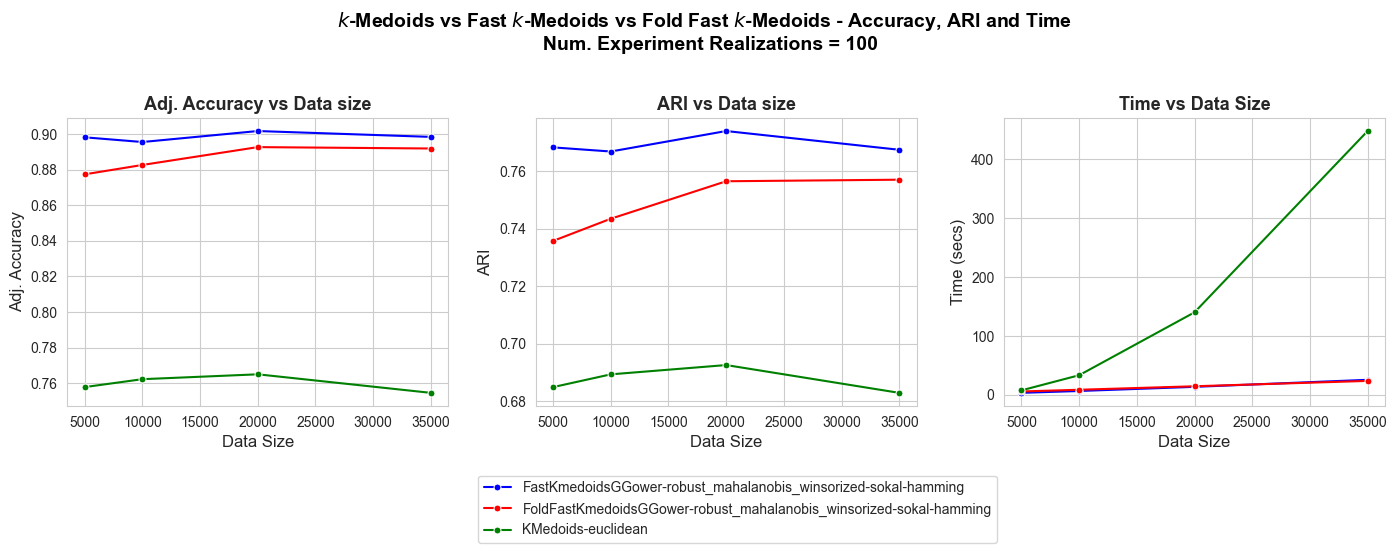

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(17,4))
axes = axes.flatten()  

#######################################################################
# Accuracy plot 
#######################################################################

model_name = 'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_acc_subset = dfs['adj_accuracy'][dfs['adj_accuracy']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['adj_accuracy'], 
             color='blue', marker='o',  markersize=5, 
             label=model_name, ax=axes[0])

################################

model_name = 'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_acc_subset = dfs['adj_accuracy'][dfs['adj_accuracy']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['adj_accuracy'], 
             color='red', marker='o',  markersize=5, 
             label=model_name, ax=axes[0])

################################

model_name = 'KMedoids-euclidean'
df_acc_subset = dfs['adj_accuracy'][dfs['adj_accuracy']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['adj_accuracy'], 
             color='green', marker='o',  markersize=5, 
             label=model_name, ax=axes[0])


#######################################################################
# ARI plot 
#######################################################################

model_name = 'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_acc_subset = dfs['ARI'][dfs['ARI']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['ARI'], 
             color='blue', marker='o',  markersize=5, 
             label='Robust Fast $k$-medoids', ax=axes[1])

################################

model_name = 'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_acc_subset = dfs['ARI'][dfs['ARI']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['ARI'], 
             color='red', marker='o',  markersize=5, 
             label='Robust Fast $k$-medoids', ax=axes[1])

################################

model_name = 'KMedoids-euclidean'
df_acc_subset = dfs['ARI'][dfs['ARI']['model_name'] == model_name]

sns.lineplot(x=df_acc_subset['n_samples'], 
             y=df_acc_subset['ARI'], 
             color='green', marker='o',  markersize=5, 
             label='$k$-medoids', ax=axes[1])


#######################################################################
# Time plot 
#######################################################################

model_name = 'FastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_time_subset = dfs['time'][dfs['time']['model_name'] == model_name]

sns.lineplot(x=df_time_subset['n_samples'], 
             y=df_time_subset['time'], 
             color='blue', marker='o',  markersize=5, 
             label=model_name, ax=axes[2])

################################


model_name = 'FoldFastKmedoidsGGower-robust_mahalanobis_winsorized-sokal-hamming'
df_time_subset = dfs['time'][dfs['time']['model_name'] == model_name]

sns.lineplot(x=df_time_subset['n_samples'], 
             y=df_time_subset['time'], 
             color='red', marker='o',  markersize=5, 
             label=model_name, ax=axes[2])

################################

model_name = 'KMedoids-euclidean'
df_time_subset = dfs['time'][dfs['time']['model_name'] == model_name]

sns.lineplot(x=df_time_subset['n_samples'], 
             y=df_time_subset['time'], 
             color='green', marker='o',  markersize=5, 
             label=model_name, ax=axes[2])

#######################################################################
# Plot details

axes[0].set_title('Adj. Accuracy vs Data size', size=13, weight='bold')
axes[0].set_ylabel('Adj. Accuracy', size=12)
#min_acc = min([min(best_accuracy[model].values()) for model in model_names])
#max_acc = max([max(best_accuracy[model].values()) for model in model_names])
#axes[0].set_yticks(np.round(np.linspace(min_acc, max_acc, 6),3))

axes[1].set_title('ARI vs Data size', size=13, weight='bold')
axes[1].set_ylabel('ARI', size=12)


axes[2].set_title('Time vs Data Size', size=13, weight='bold')
axes[2].set_ylabel('Time (secs)', size=12)
#min_time = min([min([x for x in times[model].values() if x != None]) for model in model_names])
#max_time = max([max([x for x in times[model].values() if x != None]) for model in model_names])
#axes[1].set_yticks(np.round(np.linspace(min_time, max_time, 6),3))

for i in range(len(axes)):
    #axes[i].set_xticks(data_sizes + [25000, 35000, 45000])
    axes[i].set_xlabel('Data Size', size=12)
    axes[i].legend().set_visible(False)

handles, labels = axes[2].get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(-0.7, -0.5), ncol=1, fontsize=10)
plt.subplots_adjust(top=0.83)
plt.suptitle('$k$-Medoids vs Fast $k$-Medoids vs Fold Fast $k$-Medoids - Accuracy, ARI and Time\n  Num. Experiment Realizations = 100', fontsize=14, y=1.1, weight='bold', color='black', alpha=1)
plt.subplots_adjust(hspace=0.5, wspace=0.23) 

plot_filename = f'results_experiment_2_{file_id}_with_ARI.png'
plot_save_path = os.path.join(results_folder_path, plot_filename)
fig.savefig(plot_save_path, format='png', dpi=300, bbox_inches="tight", pad_inches=0.2)

plt.show()

In [14]:
dfs['adj_accuracy']

,n_samples,model_name,adj_accuracy
0,5000,KMedoids-euclidean,0.757808
1,5000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,0.898130
2,5000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,0.877334
3,10000,KMedoids-euclidean,0.762247
4,10000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,0.895490
5,10000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,0.882604
6,20000,KMedoids-euclidean,0.764984
7,20000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,0.901661
8,20000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,0.892629
9,35000,KMedoids-euclidean,0.754568


In [16]:
dfs['ARI']

,n_samples,model_name,ARI
0,5000,KMedoids-euclidean,0.684844
1,5000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,0.768322
2,5000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,0.735750
3,10000,KMedoids-euclidean,0.689289
4,10000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,0.766888
5,10000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,0.743473
6,20000,KMedoids-euclidean,0.692526
7,20000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,0.774017
8,20000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,0.756530
9,35000,KMedoids-euclidean,0.682847


In [17]:
dfs['time']

,n_samples,model_name,time
0,5000,KMedoids-euclidean,7.607939
1,5000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,3.380461
2,5000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,5.719557
3,10000,KMedoids-euclidean,33.301685
4,10000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,6.544880
5,10000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,8.641517
6,20000,KMedoids-euclidean,140.157951
7,20000,FastKmedoidsGGower-robust_mahalanobis_winsoriz...,13.586475
8,20000,FoldFastKmedoidsGGower-robust_mahalanobis_wins...,14.571218
9,35000,KMedoids-euclidean,448.085187
